In [1]:
import pandas as pd

타이타닉 데이터 불러오기
; 타이타닉 호는 매우 유명한 해상 사고가 일어난 선박  
1912 년 4 월 15 일, 첫 항해 중에 빙산과 충돌 한 후 침몰하는데 구명정이 충분하지 않아 2224 명의 승객과 승무원 중 1502 명이 사망
여기서 운이 작용하기도 했지만 일부 그룹의 사람들은 다른 그룹보다생존 가능성이 더 높은 것으로 보이기도 
이 데이터는 데이터 분석을 배울 때 많이 사용되는 데이터

In [2]:
df = pd.read_csv("titanic.csv")

In [3]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
import numpy as np

In [5]:
data = df.to_numpy()  #.to_numpy: numby를 사용한 데이터 처리를 위해서 변환시켜줌
data, data.shape #data.shape: () 행, 열 표시

(array([[1, 0, 3, ..., 7.25, nan, 'S'],
        [2, 1, 1, ..., 71.2833, 'C85', 'C'],
        [3, 1, 3, ..., 7.925, nan, 'S'],
        ...,
        [889, 0, 3, ..., 23.45, nan, 'S'],
        [890, 1, 1, ..., 30.0, 'C148', 'C'],
        [891, 0, 3, ..., 7.75, nan, 'Q']], dtype=object),
 (891, 12))

In [6]:
_df = df.copy()

In [7]:
names = _df['Name']

## Transpose

Numpy 의 Transpose는 축의 순서를 변경해주는 결과  
9x2의 데이터의 경우 2x9의 데이터로, 또는 3x5x2 의 3차원 데이터를 2x5x3의 데이터로 변경 가능  

예로 타이타닉 데이터에 이름부분. 해당 데이터를 살펴보면 **"이름, 경칭. 성씨”**과 같은 형식으로 되어 있음  
이를 각각 분리해 볼 것

In [8]:
names = np.array(list(map(    
lambda x: [
    x.split('.')[1].strip(),
    x.split(',')[0].strip(),
    x.split(',')[1].split('.')[0].strip()
], names)))
names

array([['Owen Harris', 'Braund', 'Mr'],
       ['John Bradley (Florence Briggs Thayer)', 'Cumings', 'Mrs'],
       ['Laina', 'Heikkinen', 'Miss'],
       ...,
       ['Catherine Helen "Carrie"', 'Johnston', 'Miss'],
       ['Karl Howell', 'Behr', 'Mr'],
       ['Patrick', 'Dooley', 'Mr']], dtype='<U55')

- map: List형식의 데이터들을 각 데이터마다 순회하며 처리하는 함수
- strip: 문자열 좌우의 공백을 제거해주는 함수

--> 각 문장마다 데이터를 처리할 경우 성,이름,경칭이 하나의 리스트에 존재.
이대로는 DataFrame에 추가할 수 없음으로 데이터의 수정이 필요함

In [9]:
names = names.T
names

array([['Owen Harris', 'John Bradley (Florence Briggs Thayer)', 'Laina',
        ..., 'Catherine Helen "Carrie"', 'Karl Howell', 'Patrick'],
       ['Braund', 'Cumings', 'Heikkinen', ..., 'Johnston', 'Behr',
        'Dooley'],
       ['Mr', 'Mrs', 'Miss', ..., 'Miss', 'Mr', 'Mr']], dtype='<U55')

Numpy array의 축의 순서를 바꾸어 주었더니 성씨는 성씨끼리, 이름은 이름끼리, 경칭은 경칭끼리 모임
이 데이터를 사용해 기존 DataFrame에 추가가 가능


In [10]:
_df['First_Name']= names[0]
_df['Family_Name']= names[1]
_df['Honorific']= names[2]
_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,First_Name,Family_Name,Honorific
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Owen Harris,Braund,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,John Bradley (Florence Briggs Thayer),Cumings,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Laina,Heikkinen,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Jacques Heath (Lily May Peel),Futrelle,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,William Henry,Allen,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,Juozas,Montvila,Rev
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Margaret Edith,Graham,Miss
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,"Catherine Helen ""Carrie""",Johnston,Miss
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,Karl Howell,Behr,Mr


똑같은 과정을 **pandas**로 처리하고 싶다면?

In [11]:
_df = df.copy()
_df['First_Name']=_df['Name'].apply(lambda x: x.split('.')[1].strip())
_df['Family_Name']=_df['Name'].apply(lambda x: x.split(',')[0].strip())
_df['Honorific']=_df['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())
_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,First_Name,Family_Name,Honorific
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Owen Harris,Braund,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,John Bradley (Florence Briggs Thayer),Cumings,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Laina,Heikkinen,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Jacques Heath (Lily May Peel),Futrelle,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,William Henry,Allen,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,Juozas,Montvila,Rev
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Margaret Edith,Graham,Miss
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,"Catherine Helen ""Carrie""",Johnston,Miss
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,Karl Howell,Behr,Mr


## Indexing과 Slicing

Numpy의 배열은 행렬연산을 기준으로 하기에 여러 데이터에 한번에 연산이 가능하다.
이는 python 기본 배열 list 형식에서는 적용되지않는 Numpy의 큰 장점 중 하나이다.
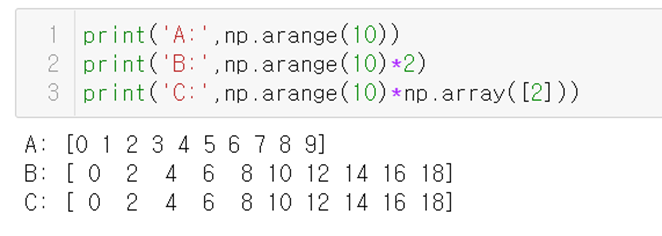


이는 조건문 연산에도 적용되며 이를 이용해 조건에 맞는 데이터만을 필터링 할 수 있다.

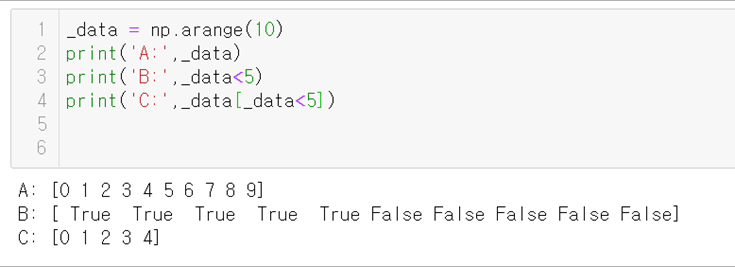

이를 이용해 타이타닉에서 같이 탑승한 가족의 수와 관계가 있는지 보도록 한다.
타이타닉 데이터의 SibSp는 형제/자매/배우자를 의미하며 Parch 는 부모/자녀를 의미한다.

In [12]:
_df = df.copy()

In [13]:
sibsp, parch= _df[['SibSp','Parch']].to_numpy().T
families = sibsp+parch+1
np.unique(families)

array([ 1,  2,  3,  4,  5,  6,  7,  8, 11])

- T 해주는 이유: DataFrame에서 여러 개의 열(column) 데이터 받을 경우 데이터를 (행 x 열) 모양으로 받음으로 각 열 데이터별로 받아야 할 경우 Transpose로 변형시켜 주어야 한다.
- +1 하는 이유: 자신도 포함시켜야 하기 때문
- np.unique: 중복 X 

In [14]:
_df['families']=families

In [15]:
_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,families
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,4
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,1


In [16]:
survived = _df['Survived'].to_numpy()
mean = []
for num_family in np.unique(families):
    mean.append(
    np.mean(
    survived[families == num_family]
    )
    )
mean = np.array(mean)
pd.DataFrame({'families':np.unique(families), 'mean':mean})

,families,mean
0,1,0.303538
1,2,0.552795
2,3,0.578431
3,4,0.724138
4,5,0.200000
5,6,0.136364
6,7,0.333333
7,8,0.000000
8,11,0.000000


- np.unique: 주어진 배열에서 중복되지 않도록 요소를 반환
- .append: Python list 형식 데이터에 데이터를 추가하는 함수
- ==: 전체 데이터 중 가족의 수가 일치하는 데이터를 True/False 형태로 반환


In [17]:
new_df = df.groupby('Pclass').mean() #숫자 세고 싶다면 count
new_df




,PassengerId,Survived,Age,SibSp,Parch,Fare
Pclass,,,,,,
1,461.597222,0.629630,38.233441,0.416667,0.356481,84.154687
2,445.956522,0.472826,29.877630,0.402174,0.380435,20.662183
3,439.154786,0.242363,25.140620,0.615071,0.393075,13.675550


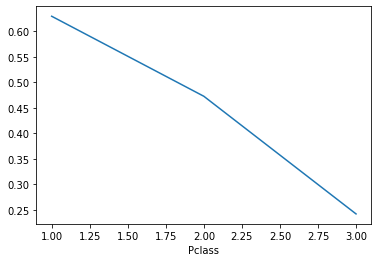

In [19]:
new_df['Survived'].plot()

In [20]:
new_df = df.groupby('Embarked').mean() #숫자 세고 싶다면 count
new_df




,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
Embarked,,,,,,,
C,445.357143,0.553571,1.886905,30.814769,0.386905,0.363095,59.954144
Q,417.896104,0.389610,2.909091,28.089286,0.428571,0.168831,13.276030
S,449.527950,0.336957,2.350932,29.445397,0.571429,0.413043,27.079812


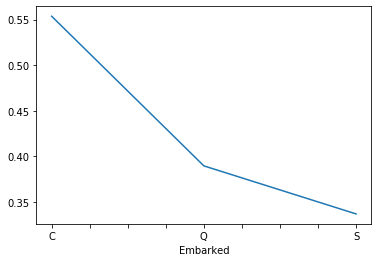

In [21]:
new_df['Survived'].plot()

In [22]:
new_df = df.groupby('Age').mean() #숫자 세고 싶다면 count
new_df

,PassengerId,Survived,Pclass,SibSp,Parch,Fare
Age,,,,,,
0.42,804.0,1.0,3.0,0.0,1.0,8.5167
0.67,756.0,1.0,2.0,1.0,1.0,14.5000
0.75,557.5,1.0,3.0,2.0,1.0,19.2583
0.83,455.5,1.0,2.0,0.5,1.5,23.8750
0.92,306.0,1.0,1.0,1.0,2.0,151.5500
...,...,...,...,...,...,...
70.00,709.5,0.0,1.5,0.5,0.5,40.7500
70.50,117.0,0.0,3.0,0.0,0.0,7.7500
71.00,295.5,0.0,1.0,0.0,0.0,42.0792


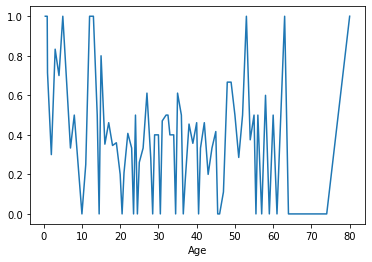

In [23]:
new_df['Survived'].plot()

In [24]:
new_df = df.groupby('Sex').mean() #숫자 세고 싶다면 count
new_df

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
Sex,,,,,,,
female,431.028662,0.742038,2.159236,27.915709,0.694268,0.649682,44.479818
male,454.147314,0.188908,2.389948,30.726645,0.429809,0.235702,25.523893


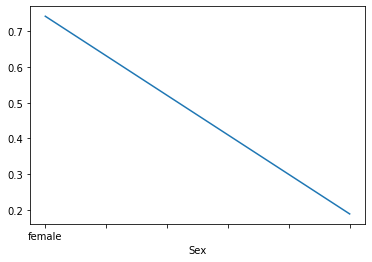

In [25]:
new_df['Survived'].plot()